# Equalización del Histograma

# Objetivo
El objetivo de esta técnicas es mejorar el contraste de las imágenes haciendo uso de la equalización del histograma.

# Teoría

Considere una imagen cuyos valores de píxeles se limitan a un rango específico de valores únicamente. Por ejemplo, una imagen más brillante tendrá todos los píxeles confinados a valores altos. Pero una buena imagen tendrá píxeles de todas las regiones de la imagen. Por lo tanto, debe estirar este histograma a ambos extremos (como se muestra en la imagen a continuación, de wikipedia) y eso es lo que hace la Ecualización de histograma (en palabras simples). Normalmente, esto mejora el contraste de la imagen.

# ¿Cómo luce exactamente?
1. Importar liberías

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

2. Cargar la imagen.

In [2]:
img  = cv2.imread('./Resources/apples.jpg', 0)

3. Calcular el histograma de la imagen.

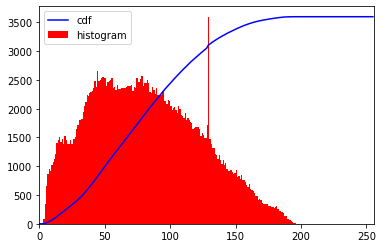

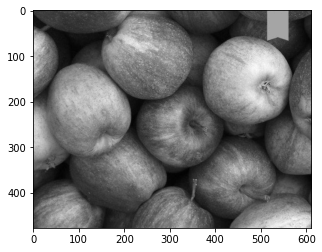

In [3]:

hist, bins = np.histogram(img.flatten(), 256, [0, 256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()


# Visualización del histograma calculado.
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.show()

# Visualizar la imagen original.
plt.imshow(img, cmap='gray')


__Nota__: como se puede ver el histograma se encuentra en un región más brillante. Necesitamos el esprectro completo. Para eso, necesitamos una función de tranformación que asigne los píxeles de entra de la región más brillante a los píxeles de salida de la región completa. Esto es lo que hace la ecualizacíón de histograma.

5. Función de transformación.

Ahora lo que se debe realizar es encontrar todos los valores mínimos del histograma (excluyendo el cero) y aplicar la ecuación de ecualización.

In [4]:
cdf_m = np.ma.masked_equal(cdf , 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf  = np.ma.filled(cdf_m, 0).astype('uint8')

6. Generar la nueve imagen.


Ahora tenemos la tabla de búsqueda que nos da la información sobre cuál es el valor de píxel de salida para cada valor de píxel de entrada. Entonces solo aplicamos la transformación.

In [7]:
img2 = cdf[img]

7. Calcular el nuevo histograma.

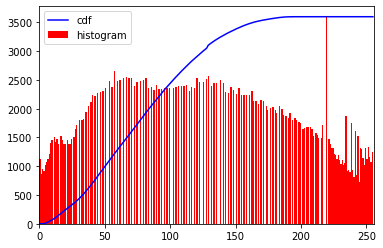

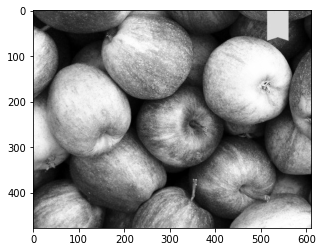

In [8]:
hist2, bins2 = np.histogram(img2.flatten(), 256, [0, 256])

cdf2 = hist.cumsum()
cdf_normalized2 = cdf2 * hist2.max() / cdf2.max()


# Visualización del histograma calculado.
plt.plot(cdf_normalized2, color = 'b')
plt.hist(img2.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.show()

# Visualizar la imagen original.
plt.imshow(img2, cmap='gray')

#  Ecualización de histogramas con OpenCV

OpenCV tiene una función para hacer esto, cv2.equalizeHist(). Su entrada es solo una imagen en escala de grises y la salida es nuestra imagen ecualizada de histograma.

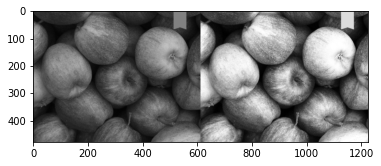

In [17]:
# Leemos la imagen.
img = cv2.imread('./Resources/apples.jpg',0)
# Aplicamos la función de equalización.
equ = cv2.equalizeHist(img)
# Unir las dos imagenes una al lado de la otra.
res = np.hstack((img,equ)) #stacking images side-by-side
# mostrar la image procesada.
plt.imshow(res, cmap = 'gray')